<a href="https://colab.research.google.com/github/angayarkannipitchumani/BatAlgorithm/blob/master/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmapper

     |████████████████████████████████| 133kB 5.1MB/s 


In [2]:
!pip install Ripser

     |████████████████████████████████| 71kB 3.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for Ripser: filename=ripser-0.6.0-cp37-cp37m-linux_x86_64.whl size=454959 sha256=13b5418144e32924ae5934895553f8f3d8ccf331ce320d911e21d839193c863f
  Stored in directory: /root/.cache/pip/wheels/95/1e/13/59da989de59903698d767dcb19414163e683a2dd31edf80417
Successfully built Ripser
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=e9b05c9d79912087a4414a2f773e38036768886816d1c990963f29154ecd5030
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp


In [3]:
!pip install scikit-tda

     |████████████████████████████████| 194kB 7.3MB/s 
     |████████████████████████████████| 4.7MB 35.0MB/s 
  ERROR: Failed building wheel for phat
  Running setup.py clean for phat
Failed to build phat
ERROR: cechmate 0.1.0 has requirement phat==1.5.0a0, but you'll have phat 1.5.0 which is incompatible.
    Running setup.py install for phat ... done


In [8]:
!pip install kmapper.plotlyviz

ERROR: Could not find a version that satisfies the requirement kmapper.plotlyviz (from versions: none)
ERROR: No matching distribution found for kmapper.plotlyviz


In [4]:
!pip install --upgrade plotly

     |████████████████████████████████| 19.1MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
!pip install umap-learn

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import sys
import sys
from sklearn import preprocessing
import kmapper as km


import plotly.graph_objs as go
import ipywidgets as ipw
from sklearn.preprocessing import LabelEncoder
import umap
labelencoder = LabelEncoder()
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with conda or pip  and then try again.")
    sys.exit()

import numpy as np
import sklearn
from sklearn import ensemble
import kmapper as km

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
from ipywidgets import (HBox, VBox)
try:
    import umap
except ImportError:
    print("This example requires the UMAP library. You can install it with the command `!pip install umap-learn`")
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/dummyDataForTADanalysis.csv")
df['Samples']=labelencoder.fit_transform(df['Samples'])
feature_names = [c for c in df.columns ]

feature_names = [c for c in df.columns if c not in ["Samples","Category"]]
#df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["Category"])


model = ensemble.IsolationForest(random_state=2) 
model.fit(X) 
lens1 = model.decision_function(X).reshape((X.shape[0], 1))
mapper = km.KeplerMapper(verbose=3) 
lens2 = mapper.fit_transform(X, projection="l2norm")
lens = np.c_[lens1, lens2]
color_values = X[:, 1]-X[:, 1].min()
graph = mapper.map( lens, X, cover=km.Cover(n_cubes=5, perc_overlap=0.4), clusterer=sklearn.cluster.KMeans(n_clusters=3, random_state=5), ) 
# Create the simplicial complex
graph = mapper.map(
    lens,
    X,
    cover=km.Cover(n_cubes=3, perc_overlap=0.4),
    clusterer=sklearn.cluster.KMeans(n_clusters=3, random_state=3),
)



# Visualization with multiple color functions
mapper.visualize(
    graph,
    path_html="finaloutput.html",
    title="Dummy Data",
    custom_tooltips=y,
    color_values=lens,
    color_function_name=["Isolation Forest", "L2-norm"],
)



KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (15, 5)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (15, 5) using lens shaped (15, 2)

Minimal points in hypercube before clustering: 3
Creating 25 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

   > Found 3 clusters in hypercube 8.
Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

   > Found 2 clusters in hypercube 14.

Created 0 edges and 5 nodes in 0:00:00.045094.
Mapping on data shaped (15, 5) using lens shaped (15, 2)

Minimal points in hypercube before clustering: 3
Creating 9 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

   > Found 3 clusters in hypercube 3.
   > Found 3 clusters in hypercube 4.
Cub

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Dummy Data | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 

In [3]:
!pip install Mapper

In [25]:
!pip install giotto-tda

     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 28.5MB 119kB/s 
     |████████████████████████████████| 3.2MB 37.9MB/s 
     |████████████████████████████████| 22.3MB 1.7MB/s 
     |████████████████████████████████| 409kB 38.2MB/s 
ERROR: cechmate 0.1.0 has requirement phat==1.5.0a0, but you'll have phat 1.5.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [11]:
# Data wrangling
import numpy as np
import pandas as pd  # Not a requirement of giotto-tda, but is compatible with the gtda.mapper module

# Data viz
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [12]:
plot_point_cloud(X)

In [17]:
!pip install scikit-learn

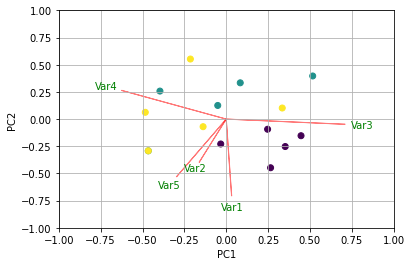

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


In [22]:
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1
filter_func = Projection(columns=[0, 1])
# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [24]:
fig = plot_static_mapper_graph(pipe, X)
fig.show(config={'scrollZoom': True})

In [26]:
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
fig = plot_static_mapper_graph(
    pipe, X, color_by_columns_dropdown=True, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

In [29]:
# Initialise estimator to color graph by
pca = PCA(n_components=1).fit(X)

fig = plot_static_mapper_graph(
    pipe, X, color_by_columns_dropdown=True, color_variable=pca
)
fig.show(config={'scrollZoom': True})

In [34]:
df.columns

Index(['Category', 'Samples', 'pos1', 'pos2', 'pos3', 'pos4', 'pos5'], dtype='object')

In [35]:
pipe.set_params(filter_func=Projection(columns=['Category', 'Samples', 'pos1', 'pos2', 'pos3', 'pos4', 'pos5']));

In [36]:
MapperPipeline(steps=[('pullback_cover',
                       ListFeatureUnion(transformer_list=[('clustering_preprocessing',
                                                           FunctionTransformer(validate=True)),
                                                          ('map_and_cover',
                                                           Pipeline(steps=[('scaler',
                                                                            FunctionTransformer()),
                                                                           ('filter_func',
                                                                            Projection(columns=['Category', 'Samples', 'pos1', 'pos2', 'pos3', 'pos4', 'pos5'])),
                                                                           ('cover',
                                                                            CubicalCover(overlap_frac=0.3))]))])),
                      ('clustering',
                       ParallelClustering(clusterer=DBSCAN(), n_jobs=1)),
                      ('nerve', Nerve())])

NameError: ignored

In [37]:
fig = plot_static_mapper_graph(pipe, df, color_by_columns_dropdown=True)
fig.show(config={'scrollZoom': True})

In [38]:
graph = pipe.fit_transform(df)

In [39]:
graph.vs.attributes()

['pullback_set_label', 'partial_cluster_label', 'node_elements']

In [51]:
node_id = 0
node_elements = graph.vs["node_elements"]

filter_func = np.sum

pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=True,
    n_jobs=n_jobs,
)


In [52]:
fig = plot_static_mapper_graph(pipe, df)
fig.show(config={'scrollZoom': True})

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


In [57]:
pipe = make_mapper_pipeline()

# Generate interactive widget
fig=plot_interactive_mapper_graph(pipe, df, color_by_columns_dropdown=True)

In [58]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(42)  # Create a random number generator

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix

from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence

from igraph import Graph

from IPython.display import SVG, display

In [66]:
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence(n_jobs=-1)
im8_cubical = cubical_persistence.fit_transform(X)

cubical_persistence.plot(im8_cubical)

In [67]:
from gtda.diagrams import Scaler

scaler = Scaler()
im8_scaled = scaler.fit_transform(im8_cubical)

scaler.plot(im8_scaled)

In [72]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=5, n_jobs=-1)
im8_heat = heat.fit_transform(im8_scaled)

# Visualise the heat kernel for H1
heat.plot(im8_heat, homology_dimension_idx=1, colorscale='jet')

In [ ]:
# uncomment this if running locally or on Google Colab
!pip install --upgrade hepml

     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 143kB 36.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 3.2MB 39.7MB/s 
     |████████████████████████████████| 409kB 26.4MB/s 
     |████████████████████████████████| 747kB 37.8MB/s 
     |████████████████████████████████| 727kB 34.6MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=dfb9d01c87171c03520b7ae7dd8e844489abe152874cc0999f50e4fcba116d5b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: giotto-tda 0.4.0 has requirement scikit-learn>=0.23.1, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
ERROR: giotto-tda 0.4.0 has requirement scipy>=1.5.0, but you'll have scipy 1.4.1 which is incompatib

In [ ]:
# data wrangling
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
from typing import List
from PIL import Image
from hepml.core import download_dataset
from scipy import ndimage

# tda magic
from gtda.homology import VietorisRipsPersistence, CubicalPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_heatmap, plot_point_cloud, plot_diagram
from gtda.pipeline import Pipeline
from hepml.core import make_point_clouds, load_shapes

# ml tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# dataviz
import matplotlib.pyplot as plt

In [ ]:
point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=20, noise=0.5)
point_clouds_basic.shape, X.shape

((30, 400, 3), (15, 5))

In [ ]:
plot_point_cloud(X)

In [ ]:
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X, y)
# score
rf.oob_score_

0.2

In [ ]:
dgm = CubicalPersistence(homology_dimensions=[0]).fit_transform(X)

In [ ]:
dgm

array([[[0., 1., 0.]],

       [[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 1., 0.]],

       [[0., 1., 0.]]])

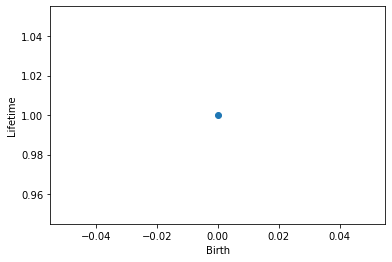

In [ ]:
plt.scatter(dgm[0][:, 0], dgm[0][:, 1] - dgm[0][:, 0])
plt.xlabel('Birth')
plt.ylabel('Lifetime')
plt.show()

In [ ]:
df.head()

,Category,Samples,pos1,pos2,pos3,pos4,pos5
0,1,0,0,1,1,0,1
1,1,7,1,0,0,0,1
2,1,8,1,0,1,0,1
3,1,9,1,1,1,0,1
4,1,10,1,1,1,0,0


In [ ]:
# use DataFrame.values to conver to NumPy array
plot_point_cloud(df.query('Category')[[ "pos1", "pos2","pos3","pos4","pos5"]].values)

In [ ]:
# use DataFrame.values to conver to NumPy array

point_clouds = np.asarray([df.query('Category')[[ "pos1", "pos2","pos3","pos4","pos5"]].values for shape in df["Category"].unique()])

point_clouds.shape

(3, 15, 5)

In [ ]:
# track connected components, loops, and voids
homology_dimensions = [0, 1, 2]

# calculating H2 persistence is memory intensive - see below to use precomputed arrays
persistence = VietorisRipsPersistence(metric="euclidean", homology_dimensions=homology_dimensions, n_jobs=6)

%time persistence_diagrams = persistence.fit_transform(point_clouds)

CPU times: user 39.8 ms, sys: 61.3 ms, total: 101 ms
Wall time: 1.77 s


In [ ]:
DATA = Path("/")

with open(DATA / "diagrams.pkl", "wb") as f:
    pickle.dump(persistence_diagrams, f)

In [ ]:
with open(DATA / "diagrams.pkl", "rb") as f:
    diagrams = pickle.load(f)

In [ ]:

index = 0
plot_diagram(diagrams[2])

In [ ]:
persistent_entropy = PersistenceEntropy()
# calculate topological feature matrix
XZ = persistent_entropy.fit_transform(diagrams)
# expect shape - (n_point_clouds, n_dims)
XZ.shape

(3, 3)

In [ ]:
plot_point_cloud(XZ)

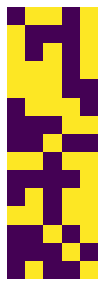

In [ ]:
thresh = 70
idxs = np.arange(dgm[0].shape[0])
idxs = idxs[np.abs(dgm[0][:, 1] - dgm[0][:, 0]) > thresh]

plt.figure(figsize=(8, 5))
plt.imshow(X)

X, Y = np.meshgrid(np.arange(X.shape[1]), np.arange(X.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(-X + dgm[0][idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, "k")
plt.axis("off")

plt.show()

In [ ]:
!pip install gudhi

     |████████████████████████████████| 28.2MB 136kB/s 


In [ ]:
from tqdm.notebook import tqdm
import gudhi 
import numpy as np
import matplotlib.pyplot as plt
st = gudhi.RipsComplex(points = X/2, max_edge_length = 0.3).create_simplex_tree(max_dimension=3)
barcode = st.persistence(homology_coeff_field = 2)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)
